In [1]:
# so kernel doesn't have to be restarted
%load_ext autoreload
%autoreload 2

# sklearn imports
from sklearn.neighbors import NearestNeighbors, KNeighborsTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imodels imports
from imodels import get_clean_dataset
from imodels.tree.rf_plus.rf_plus.rf_plus_models import RandomForestPlusClassifier
from imodels.tree.rf_plus.feature_importance.rfplus_explainer import RFPlusMDI

# data getters
from ucimlrepo import fetch_ucirepo
import openml

# local feature importance
import shap
import lime

# helper scripts
from knn_helper import *

Matplotlib is building the font cache; this may take a moment.


In [16]:
shap_distances, lime_distances, lmdi_distances = perform_pipeline(3, "openml", 43)

/accounts/grad/zachrewolinski/research/imodels-experiments/feature_importance/counterfactuals/knn_helper.py:263: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/openml/tasks/task.py:150: Fut

Data Retrieved


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 17.9min finished


Models Fit


KeyboardInterrupt: 

In [6]:
# shap_distances = np.loadtxt("results/openml_361071/shap_distances_k3.csv", delimiter=",")
# lime_distances = np.loadtxt("results/openml_361071/lime_distances_k3.csv", delimiter=",")
# lmdi_distances = np.loadtxt("results/openml_361071/lmdi_distances_k3.csv", delimiter=",")

In [7]:
# # print means and medians of each:
# print("SHAP - Mean:", np.mean(shap_distances), "Median:", np.median(shap_distances))
# print("LIME - Mean:", np.mean(lime_distances), "Median:", np.median(lime_distances))
# print("LMDI - Mean:", np.mean(lmdi_distances), "Median:", np.median(lmdi_distances))

# # plot distances
# plt.figure(figsize=(10, 6))
# plt.hist(shap_distances, bins=30, alpha=0.5, label='SHAP', color='blue')
# plt.hist(lime_distances, bins=30, alpha=0.5, label='LIME', color='orange')
# plt.hist(lmdi_distances, bins=30, alpha=0.5, label='LMDI', color='green')
# plt.xlabel('Average Distance to 3 Closest Opposite Label Neighbors')
# plt.ylabel('Frequency')
# plt.title('Distribution of Distances to Three Closest Opposite Label Neighbors')
# plt.legend()
# plt.show()

In [8]:
# set seed
np.random.seed(42)

# get and split data
X, y = get_data('uci', 15)
# X, y, = get_data('openml', 43)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.33, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# get fit models
rf, rf_plus = fit_models(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means

In [10]:
# get shap
shap_valid = get_shap(X_valid, rf)
shap_test = get_shap(X_test, rf)

# get lime
lime_valid = get_lime(X_valid, rf)
lime_test = get_lime(X_test, rf)

In [12]:
# get lmdi values
lmdi_valid = get_lmdi(X_valid, y_valid, rf_plus)
lmdi_test = get_lmdi(X_test, y_test, rf_plus)

In [ ]:
# # fit nearest neighbor models
# shap_nbrs = NearestNeighbors(n_neighbors=len(X_valid))
# shap_nbrs.fit(shap_valid)
# lime_nbrs = NearestNeighbors(n_neighbors=len(X_valid))
# lime_nbrs.fit(lime_valid)
# lmdi_nbrs = NearestNeighbors(n_neighbors=len(X_valid))
# lmdi_nbrs.fit(lmdi_valid)

# # get distances and indices of neighbors, ranked
# shap_dist, shap_idxs = shap_nbrs.kneighbors(shap_test)
# lime_dist, lime_idxs = lime_nbrs.kneighbors(lime_test)
# lmdi_dist, lmdi_idxs = lmdi_nbrs.kneighbors(lmdi_test)

In [13]:
k = 3
shap_opposite = get_k_opposite_neighbors(k, shap_valid, shap_test, y_valid, y_test)
lime_opposite = get_k_opposite_neighbors(k, lime_valid, lime_test, y_valid, y_test)
lmdi_opposite = get_k_opposite_neighbors(k, lmdi_valid, lmdi_test, y_valid, y_test)

In [14]:
shap_distances = get_average_nbr_dist(k, shap_opposite, X_valid, X_test)
lime_distances = get_average_nbr_dist(k, lime_opposite, X_valid, X_test)
lmdi_distances = get_average_nbr_dist(k, lmdi_opposite, X_valid, X_test)

/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/scratch/users/zachrewolinski/conda/envs/mdi/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


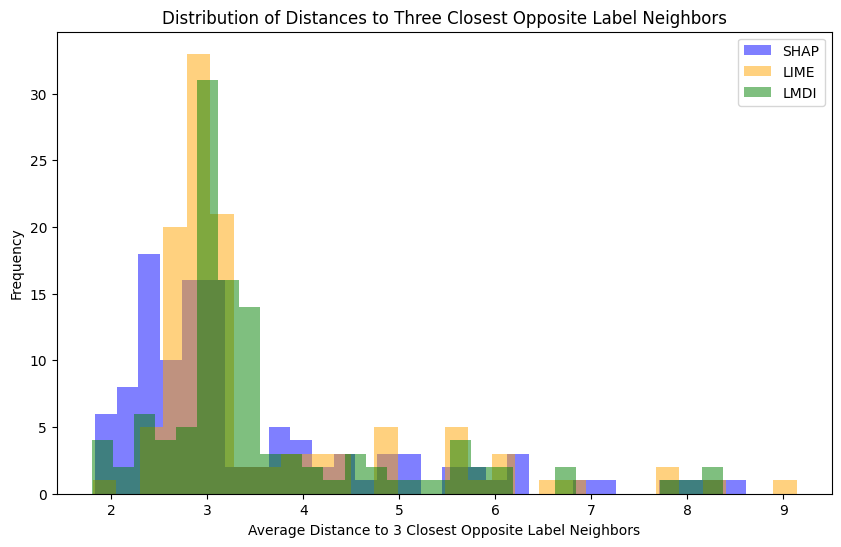

In [15]:
# plot distances
plt.figure(figsize=(10, 6))
plt.hist(shap_distances, bins=30, alpha=0.5, label='SHAP', color='blue')
plt.hist(lime_distances, bins=30, alpha=0.5, label='LIME', color='orange')
plt.hist(lmdi_distances, bins=30, alpha=0.5, label='LMDI', color='green')
plt.xlabel('Average Distance to 3 Closest Opposite Label Neighbors')
plt.ylabel('Frequency')
plt.title('Distribution of Distances to Three Closest Opposite Label Neighbors')
plt.legend()
plt.show()